# Importing librarires which are required 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as img
import cv2
import pathlib
from PIL import Image
from random import randint
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow import keras
from keras import layers
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator as IDG
from tensorflow.keras.layers import SeparableConv2D, BatchNormalization, GlobalAveragePooling2D

# Spliting the dataset into test,train and val

In [52]:
import splitfolders
splitfolders.ratio('Dataset', output="output", seed=123, ratio=(.7, 0.1,0.2))

Copying files: 6400 files [00:08, 735.61 files/s]


In [68]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 4479 files belonging to 4 classes.
Found 639 files belonging to 4 classes.
Found 1282 files belonging to 4 classes.


In [17]:
class_names = val_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Data samples from the test dataset

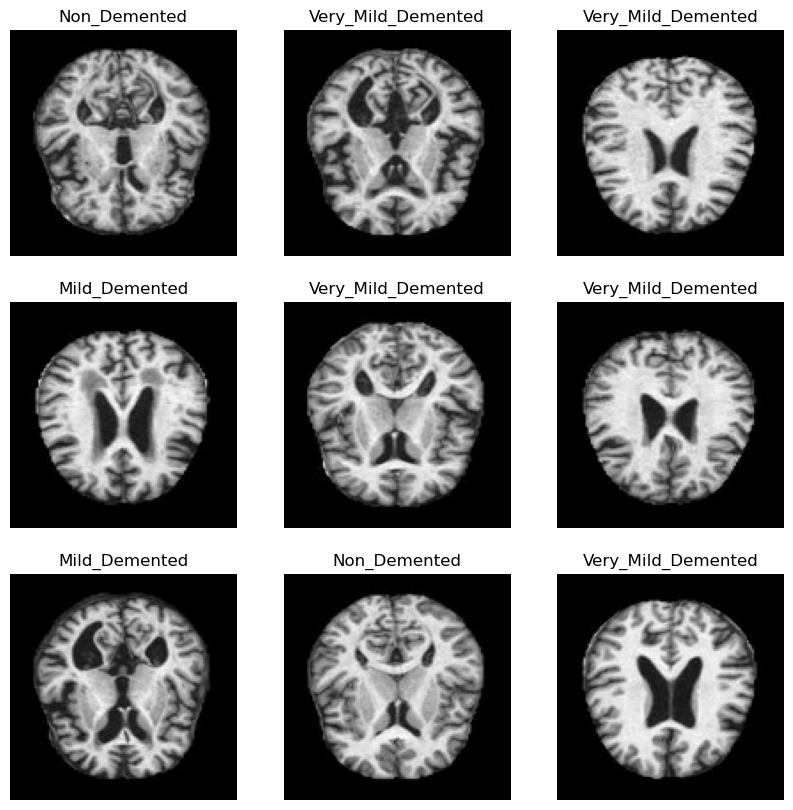

In [18]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

<function matplotlib.pyplot.show(close=None, block=None)>

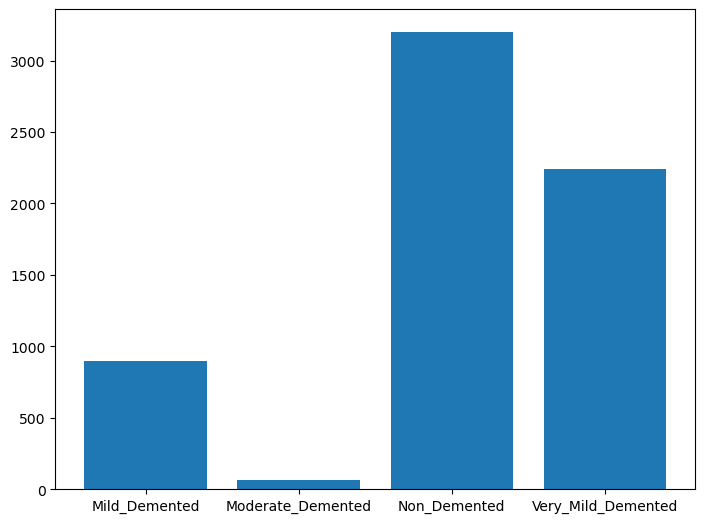

In [19]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
size = [896,64,3200,2240]
ax.bar(class_names,size)
plt.show

# model building

In [20]:
from tensorflow import keras

num_classes = 4  # Total number of classes


model = keras.models.Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
model.add(keras.layers.Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64,"relu"))
model.add(keras.layers.Dense(4,"softmax")) #4 classes


In [21]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "Adam",metrics=["accuracy"])

In [16]:
from tensorflow.keras.callbacks import CSVLogger

# Define the path to the CSV file where you want to store the training history
csv_logger = CSVLogger('training_history.csv', separator=',', append=False)

# Add the CSVLogger callback to the list of callbacks in model.fit
hist = model.fit(train_ds, validation_data=test_ds, epochs=100, batch_size=64, verbose=1, callbacks=[csv_logger])


Epoch 1/100
70/70 [==============================] - 41s 568ms/step - loss: 1.2713 - accuracy: 0.4796 - val_loss: 1.0076 - val_accuracy: 0.4992
Epoch 2/100
70/70 [==============================] - 37s 531ms/step - loss: 0.9499 - accuracy: 0.5280 - val_loss: 0.9496 - val_accuracy: 0.5429
Epoch 3/100
70/70 [==============================] - 36s 511ms/step - loss: 0.8532 - accuracy: 0.5970 - val_loss: 0.8094 - val_accuracy: 0.6576
Epoch 4/100
70/70 [==============================] - 36s 512ms/step - loss: 0.7714 - accuracy: 0.6417 - val_loss: 0.7249 - val_accuracy: 0.6919
Epoch 5/100
70/70 [==============================] - 37s 522ms/step - loss: 0.6833 - accuracy: 0.6959 - val_loss: 0.6421 - val_accuracy: 0.7363
Epoch 6/100
70/70 [==============================] - 40s 570ms/step - loss: 0.5962 - accuracy: 0.7412 - val_loss: 0.5918 - val_accuracy: 0.7223
Epoch 7/100
70/70 [==============================] - 39s 555ms/step - loss: 0.5114 - accuracy: 0.7834 - val_loss: 0.4541 - val_accuracy:

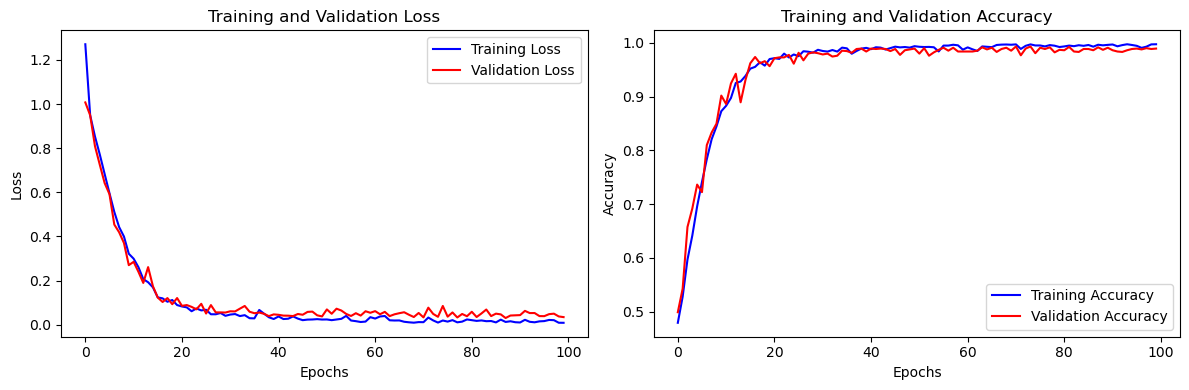

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Load training history from the CSV file
training_history = pd.read_csv('training_history.csv')

# Extract relevant data
epochs = training_history['epoch']
train_loss = training_history['loss']
val_loss = training_history['val_loss']
train_acc = training_history['accuracy']
val_acc = training_history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss', color='blue')
plt.plot(epochs, val_loss, label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, label='Training Accuracy', color='blue')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


model is not overfitting as clear seen above 

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)       

In [33]:
from tensorflow.keras.models import load_model

loaded_model = load_model("Alzheimer_CNN2d.h5")


In [35]:
# Assuming you have already loaded your model, e.g., loaded_model = load_model("Alzheimer_CNN2d.h5")

# Evaluate on the validation dataset (val_ds)
val_results = loaded_model.evaluate(val_ds)

# Evaluate on the test dataset (test_ds)
test_results = loaded_model.evaluate(test_ds)

# Print the evaluation results
print("Validation Loss:", val_results[0])
print("Validation Accuracy:", val_results[1])
print("Test Loss:", test_results[0])
print("Test Accuracy:", test_results[1])


21/21 [==============================] - 2s 88ms/step - loss: 0.0346 - accuracy: 0.9891
Validation Loss: 0.06459031999111176
Validation Accuracy: 0.9812206625938416
Test Loss: 0.03461609408259392
Test Accuracy: 0.9890795350074768


# model saved (24.4mb)

In [23]:
model.save("Alzheimer_CNN2d.h5")

C:\Users\akash boss\AppData\Roaming\Python\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [45]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create empty lists to store true labels and predicted labels
test_labels = []
test_predictions = []

# Loop through the test dataset and make predictions
for images, labels in val_ds:
    test_labels.extend(labels.numpy())
    predictions = loaded_model.predict(images)  # Use your loaded model for predictions
    predicted_labels = np.argmax(predictions, axis=1)
    test_predictions.extend(predicted_labels)

# Calculate confusion matrix for the test dataset
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Calculate overall accuracy
accuracy = accuracy_score(test_labels, test_predictions)

# Calculate overall precision, recall, and F1 score
precision = precision_score(test_labels, test_predictions, average='weighted')
recall = recall_score(test_labels, test_predictions, average='weighted')
f1 = f1_score(test_labels, test_predictions, average='weighted')

# Calculate overall sensitivity
sensitivity = recall_score(test_labels, test_predictions, average='weighted')

# Calculate overall specificity
num_classes = len(class_names)
true_negatives = np.sum(np.delete(np.delete(conf_matrix, range(num_classes), axis=0), range(num_classes), axis=1))
false_positives = np.sum(conf_matrix, axis=0) - true_negatives
false_negatives = np.sum(conf_matrix, axis=1) - true_negatives
specificity = true_negatives / (true_negatives + false_positives)


2/2 [==============================] - 0s 46ms/step


In [46]:
print("Overall Accuracy:", accuracy)
print("Overall Precision:", precision)
print("Overall Recall (Sensitivity):", recall)
print("Overall F1 Score:", f1)


Overall Accuracy: 0.9812206572769953
Overall Precision: 0.9814640867675082
Overall Recall (Sensitivity): 0.9812206572769953
Overall F1 Score: 0.9812324275646944


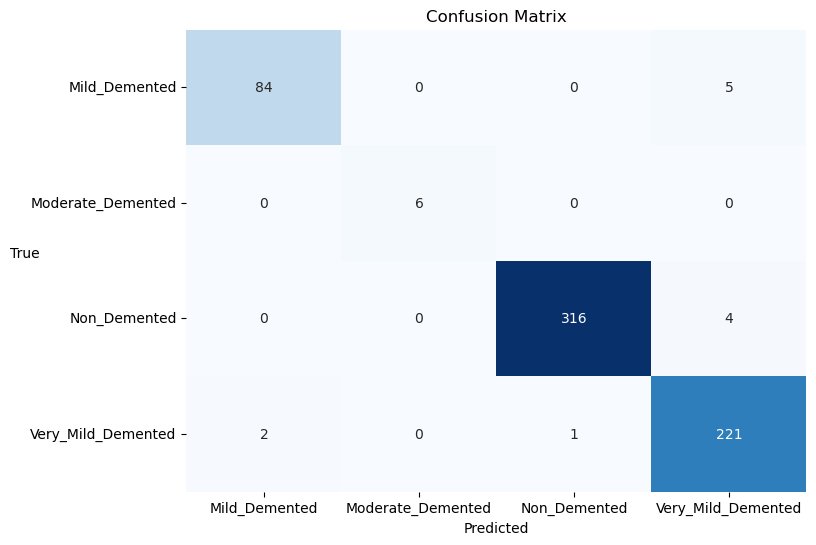

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, class_names):
    fig, ax = plt.subplots(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted')
    plt.ylabel('True', rotation=0)  # Rotate the y-axis labels to be horizontal
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names, rotation=0)  # Rotate the y-axis labels to be horizontal
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you've calculated the confusion matrix earlier and have class_names defined.
plot_confusion_matrix(conf_matrix, class_names)


# Predicitions 

1/1 [==============================] - 0s 22ms/step


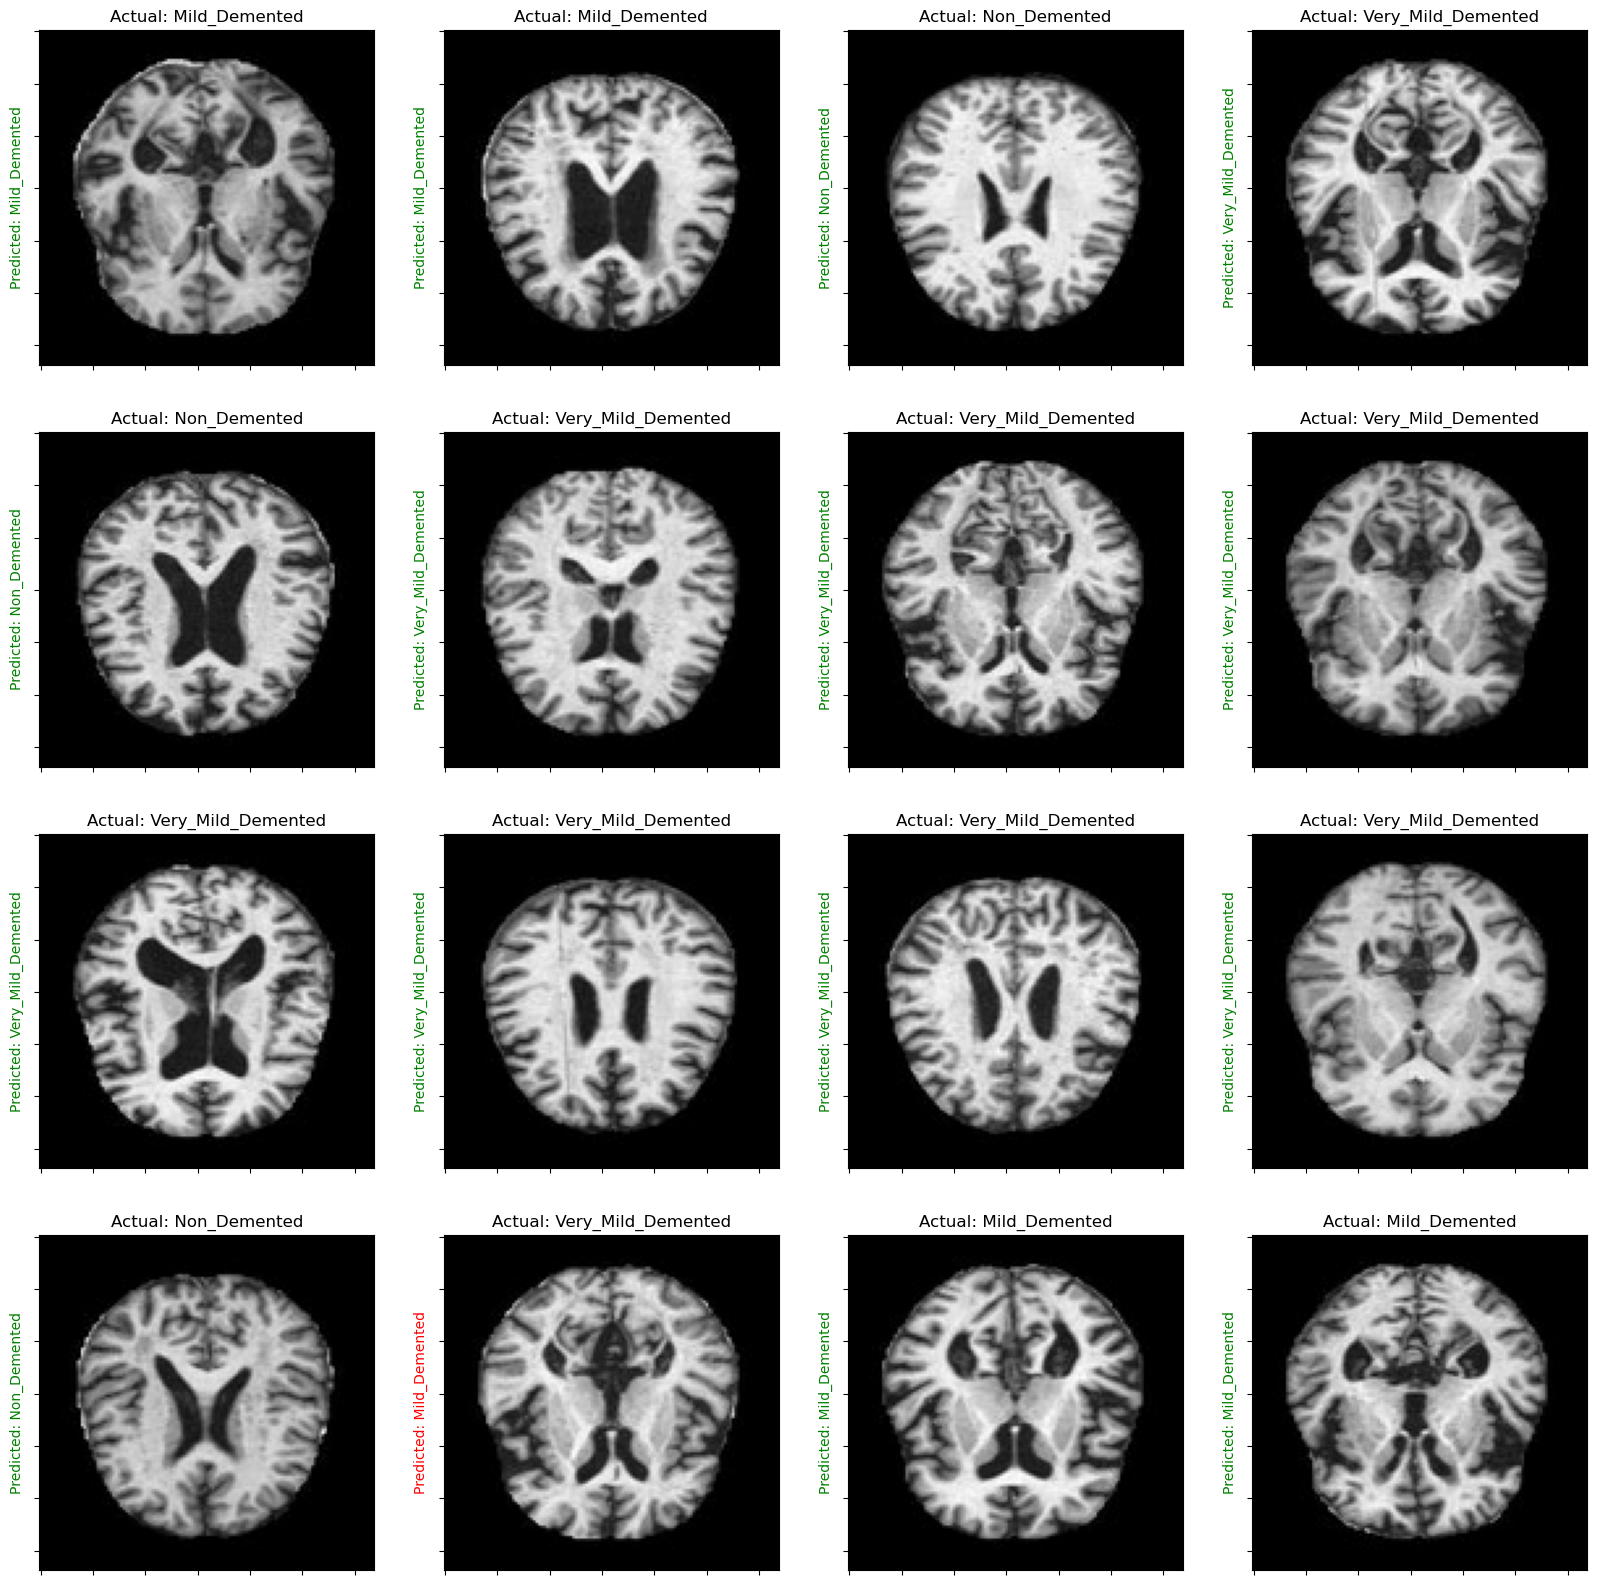

In [51]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(20, 20))

for images, labels in val_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = loaded_model.predict(tf.expand_dims(images[i], 0))  # Use your loaded model for predictions
        score = tf.nn.softmax(predictions[0])
        
        actual_label = class_names[labels[i]]
        predicted_label = class_names[np.argmax(score)]
        
        if actual_label == predicted_label:
            title_color = 'green'
        else:
            title_color = 'red'
        
        plt.title(f"Actual: {actual_label}")
        plt.ylabel(f"Predicted: {predicted_label}", fontdict={'color': title_color})
        plt.gca().axes.yaxis.set_ticklabels([])
        plt.gca().axes.xaxis.set_ticklabels([])

plt.show()


observation :
As the model accuracy is 98.12 so all the data samples are not predicting accurately 

In [63]:
import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# Load the pre-trained model
model = keras.models.load_model('Alzheimer_CNN2d.h5')  # Replace with the actual path to your saved model

# Define the class labels
class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Initialize lists to store image filenames and predicted class labels
filenames = []
predicted_labels = []

# Define the directory path for your dataset
val_ds_dir = "output/val"  # Update with the correct path

# Iterate through the class labels in a sequential manner
for class_label in class_labels:
    class_dir = os.path.join(val_ds_dir, class_label)
    image_files = os.listdir(class_dir)
    
    # Iterate through the images in the current class
    for image_filename in image_files:
        image_path = os.path.join(class_dir, image_filename)
        image = tf.image.decode_image(tf.io.read_file(image_path))
        
        # Convert the image to three channels (RGB)
        image = tf.image.grayscale_to_rgb(image)
        image = tf.image.resize(image, (128, 128))  # Resize to match model input size (128x128)
        image = tf.expand_dims(image, 0)
        
        predictions = model.predict(image)
        predicted_label = class_labels[np.argmax(predictions)]
        
        # Extract the image filename without the file extension
        filename_without_extension = os.path.splitext(image_filename)[0]
        
        filenames.append(filename_without_extension)
        predicted_labels.append(predicted_label)

# Create a DataFrame to store the data
data = {'Image': filenames, 'Predicted_Label': predicted_labels}
df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('predicted_labels_sequential.csv', index=False)  # Replace 'predicted_labels_sequential.csv' with your desired file name


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


In [66]:
import streamlit as st
import tensorflow as tf
import numpy as np
from PIL import Image

# Load the pre-trained model
model_path = "Alzheimer_CNN2d.h5"  # Replace with the actual path to your saved model
model = tf.keras.models.load_model(model_path)

# Define class labels
class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

# Set page title and background image
st.set_page_config(
    page_title="Alzheimer's Detection",
    page_icon="✅",
    layout="centered",
    initial_sidebar_state="auto",
)
st.markdown(
    """
    <style>
    .stApp {
        background-image: url('C:\\Users\\akash boss\\OneDrive\\Desktop\\MIT-AlzGenome-01-press.jpg');
        background-size: cover;
    }
    </style>
    """,
    unsafe_allow_html=True,
)

# Title and description
st.title("Alzheimer's Disease Detection")
st.write("Upload an MRI brain image to predict Alzheimer's class.")

# Image upload
uploaded_image = st.file_uploader("Upload an MRI image", type=["jpg", "jpeg", "png"])

# Prediction
if uploaded_image is not None:
    st.write("Image Preview:")
    st.image(uploaded_image, use_column_width=True)

    image = Image.open(uploaded_image)
    image = image.resize((128, 128))  # Resize to match model input size
    image = np.array(image)

    # Ensure the image has 3 channels (RGB)
    if image.shape[-1] == 1:
        image = np.dstack([image] * 3)

    image = tf.image.convert_image_dtype(image, tf.float32)

    # Add a batch dimension
    image = tf.expand_dims(image, axis=0)

    # Make predictions  
    predictions = model.predict(image)
    predicted_label = class_labels[np.argmax(predictions)]

    st.write("Predicted Class:", predicted_label)


2023-11-06 22:24:12.307 
  command:

    streamlit run C:\Users\akash boss\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
